In [3]:
import pandas as pd
import numpy as np

In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")


In [7]:
train_head=train.head()

In [9]:
train_head

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test_head=test.head()
test_head

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
missing_train=train.isnull().sum().sort_values(ascending=False)
missing_train=missing_train[missing_train>0]
missing_train=missing_train.to_frame(name="Eksik Sayısı")
missing_train

,Eksik Sayısı
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [15]:
missing_test=test.isnull().sum().sort_values(ascending=False)
missing_test=missing_test[missing_test>0]
missing_test=missing_test.to_frame("Eksik Değer Sayısı")
missing_test

,Eksik Değer Sayısı
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78


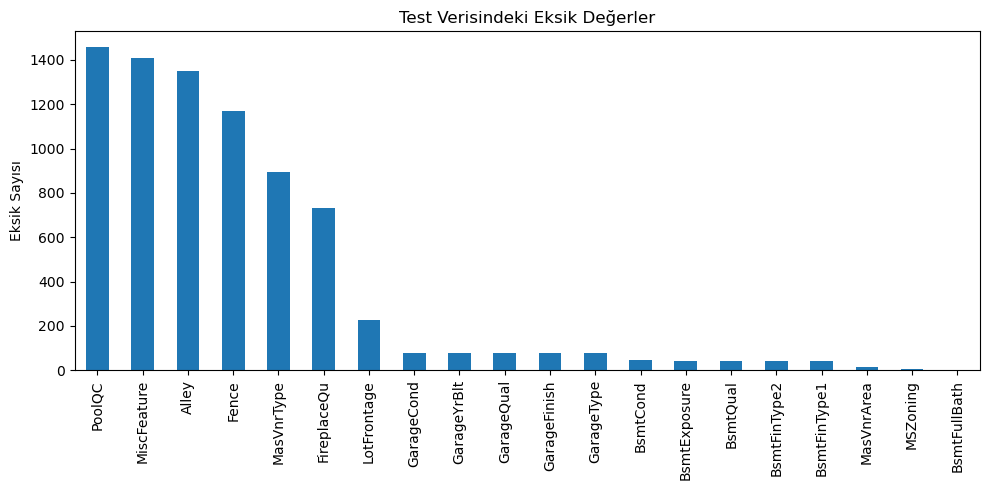

In [17]:
# Test verisinde eksik değerleri tekrar hesaplayalım ve DataFrame'e çevirelim
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
missing_test = missing_test.to_frame(name='Eksik Sayısı')

# En çok eksik değere sahip 20 sütunu çubuk grafikle çiz
import matplotlib.pyplot as plt

missing_test.sort_values(by='Eksik Sayısı', ascending=False).head(20).plot(
    kind='bar', figsize=(10, 5), legend=False
)

plt.title("Test Verisindeki Eksik Değerler")
plt.ylabel("Eksik Sayısı")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


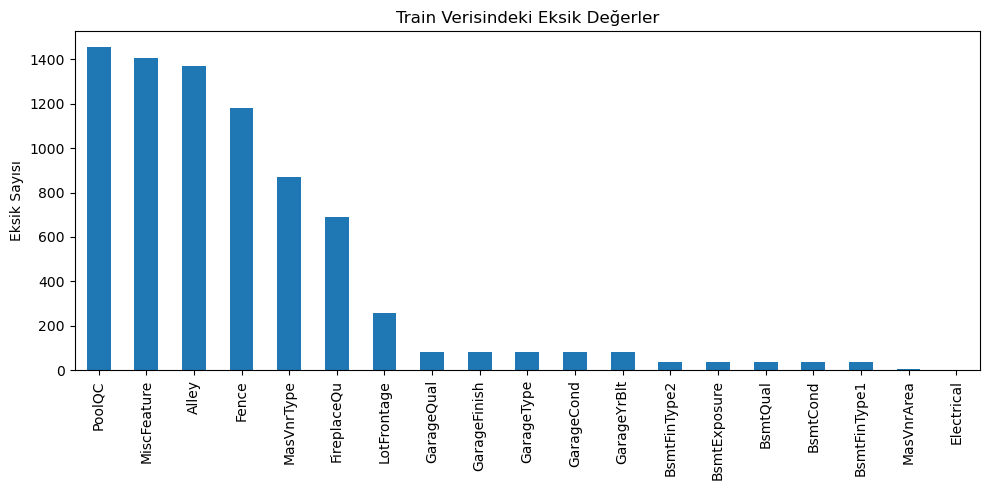

In [18]:
import matplotlib.pyplot as plt

missing_train.sort_values(ascending=False, by='Eksik Sayısı').head(20).plot(kind='bar', figsize=(10, 5), legend=False)

plt.title("Train Verisindeki Eksik Değerler")
plt.ylabel("Eksik Sayısı")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
#Eğitim verisi kopyalarak bakalım
train_cleaned=train.copy()

#Kategorik eksik değereleri "None" ile dolduralım
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']

for col in cols_fill_none:
    train_cleaned[col]=train_cleaned[col].fillna("None")

#Sayısal eksik değerleri 0 ile dolduracağız
cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    train_cleaned[col]=train_cleaned[col].fillna(0)

#LotFrontage(arsa cephesi)- aynı mahalledeki ortalama ile doldur
train_cleaned["LotFrontage"]=train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Elektrical- en sık görülen değer ile doldur
train_cleaned["Electrical"]= train_cleaned["Electrical"].fillna(train_cleaned["Electrical"].mode()[0])
# Kalan eksik değerleri tekrar kontrol edelim
missing_after = train_cleaned.isnull().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)
missing_after=missing_after.to_frame("Eksik Değer Sayisi")
missing_after

,Eksik Değer Sayisi


In [23]:
# Test verisini de temizleyelim (orijinal bozulmasın)
test_cleaned = test.copy()

# Aynı stratejiyle kategorik eksikleri "None" ile doldur
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']
for col in cols_fill_none:
    test_cleaned[col] = test_cleaned[col].fillna('None')

# Sayısal eksikleri 0 ile dolduralım
cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    test_cleaned[col] = test_cleaned[col].fillna(0)

# LotFrontage - mahalle medyanı ile doldur
test_cleaned['LotFrontage'] = test_cleaned.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Electrical varsa doldur
if test_cleaned['Electrical'].isnull().sum() > 0:
    test_cleaned['Electrical'] = test_cleaned['Electrical'].fillna(test_cleaned['Electrical'].mode()[0])
# Son kalan eksikleri gösterelim
missing_test_after = test_cleaned.isnull().sum()
missing_test_after = missing_test_after[missing_test_after > 0].sort_values(ascending=False)
missing_test_after=missing_test_after.to_frame("Eksik değer sayısı")
missing_test_after

,Eksik değer sayısı
MSZoning,4
Utilities,2
Functional,2
Exterior1st,1
Exterior2nd,1
KitchenQual,1
SaleType,1


In [25]:
#Kalan eksik kategorik değişkenleri en sık göreülen değer olan mod ile dolduralım
fill_mode_cols = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd']
for col in fill_mode_cols:
    test_cleaned[col]=test_cleaned[col].fillna(test_cleaned[col].mode()[0])
#Eksik değer Kalıp Kalmadığına bakalım
final_missing_test=test_cleaned.isnull().sum()
final_missing_test=final_missing_test[final_missing_test>0]
final_missing_test=final_missing_test.to_frame("Son kayıp değerler")
final_missing_test


,Son kayıp değerler
KitchenQual,1
SaleType,1


In [27]:
#Kalan son kategorik eksikleri mod değerle dolduralım
test_cleaned["KitchenQual"]=test_cleaned["KitchenQual"].fillna(test_cleaned["KitchenQual"].mode()[0])
test_cleaned["SaleType"]=test_cleaned["SaleType"].fillna(test_cleaned["SaleType"].mode()[0])
# Eksik değer kalıp kalmadığını son kez kontrol edelim
final_check = test_cleaned.isnull().sum()
final_check = final_check[final_check >0 ]
final_check=final_check.to_frame("Eksik değer son kontrol :) ")
final_check

,Eksik değer son kontrol :)


In [ ]:
#Özellik mühendisliği, ham verileri makine öğrenmesi algoritmalarının anlayabileceği şekilde dönüştürme ve geliştirme sürecidir.
#Amaç:
#Modelin daha iyi öğrenmesini sağlamak
#Anlamsız veya çarpık yapıları düzeltmek
#Önemli bilgiyi gizli biçimden görünür hale getirmek

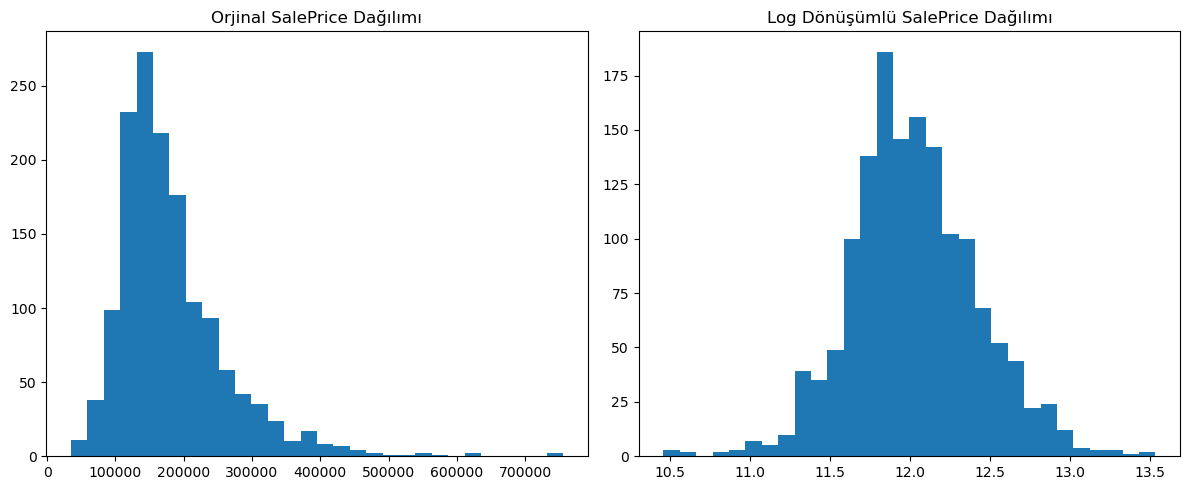

In [31]:
#SalesPrice değişkeni sağa çarpık( nasıl anladım?[yukarıda ki histogram grafiklerini inceleyecek olursak genelde sağ kuyrukların uzun olduğunu gözlemliyoruz
#bu sayede sağa çarpık olduğunun farkına varıyoruz])

#Dönüşüm öncesi ve sonrası karşılaştıralım
fig,axes= plt.subplots(1,2, figsize=(12,5))
#Orjinal SalePRice Dağılımı
axes[0].hist(train_cleaned["SalePrice"],bins=30)
axes[0].set_title("Orjinal SalePrice Dağılımı")

#Log dönüşümü SalePRice
log_saleprice=np.log1p(train_cleaned["SalePrice"]) #log(1+x)
axes[1].hist(log_saleprice,bins=30)
axes[1].set_title("Log Dönüşümlü SalePrice Dağılımı")

plt.tight_layout()
plt.show()


In [33]:
#Soldaki dağılım, SalePrice değişkeninin orijinal halidir. Sağ kuyruklu, çarpık bir dağılım var (bazı evler aşırı pahalı).

#Sağdaki dağılım, np.log1p() ile dönüştürülmüş halidir. Daha simetrik ve normal dağılıma yakın. Bu, lineer modeller için daha uygundur.

#Regresyon, modelleme için daha uygun sağdaki grafik, aykırı değerler yumuşatılmış oluyor ve simetriye daha yakın oluyor




In [35]:
#Target Log dönüşümünü ekle
train_cleaned["LogSalePrice"]=np.log1p(train_cleaned["SalePrice"])

#SalePrice ve Id dışındaki sütunlar kullanılacak
#Id gereksiz değişken
#SalePrice bizim hedef değişkenimiz ondan girdide olmasına gerek yok

train_features=train_cleaned.drop(["Id","SalePrice"],axis=1)
test_features=test_cleaned.drop(["Id"],axis=1)

#One-hot encoding
train_encoded=pd.get_dummies(train_features)
test_encoded=pd.get_dummies(test_features)

#Train ve Test feature'larını hizala
train_encoded,test_encoded= train_encoded.align(test_encoded,join="left",axis=1,fill_value=0)




In [37]:
train_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,True,False,False,False,False,True,False


In [39]:
test_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,True,True,False,False,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,True,True,False,False,False,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,True,False,False,False,False,True,False


📈 RMSE Nedir?
Root Mean Squared Error

Gerçek değer ile tahmin arasındaki farkın karelerinin ortalamasının kareköküdür.

📌 RMSE ne kadar küçükse → tahminler o kadar başarılıdır.


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Hedef Değişken(log dönüşümü)
y=train_cleaned["LogSalePrice"]
X=train_encoded

#Lineer Regresyon modelini oluşturalım
lr=LinearRegression()
# 5 katlı çapraz doğrulama ile ortalama RMSE hesaplayalım
# scoring='neg_root_mean_squared_error' kullanıyoruz çünkü RMSE pozitif olmalı
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores  # negatif olduğu için eksiyle çarpıyoruz
# RMSE sonuçlarını ve ortalamasını tablo olarak gösterelim
rmse_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'RMSE': rmse_scores
})
rmse_df.loc['Ortalama'] = ['-', rmse_scores.mean()]
rmse_df

,Fold,RMSE
0,1,2.462916e-12
1,2,1.008551e-12
2,3,2.264401e-12
3,4,2.479589e-14
4,5,3.110713e-13
Ortalama,-,1.214347e-12


🔍 İlk LinearRegression modelimizin 5 katlı çapraz doğrulama sonuçları yukarıda. 
RMSE (Root Mean Squared Error) değerleri çok düşük görünüyor — neredeyse sıfır.

Bu, yüksek olasılıkla overfitting (aşırı öğrenme) veya veride hedefle sızıntı (data leakage) olabileceğini gösteriyor. 
Çünkü gerçek dünyada neredeyse sıfır hata pek mümkün değildir.

🔍 Neden Olabilir?
Bazı değişkenler doğrudan veya dolaylı olarak SalePrice ile çok güçlü ilişkili olabilir (örneğin toplam alan vs).

Belki de bazı sütunlar modelin işi fazla kolaylaştırmış olabilir.



🔍 Ridge nedir?

Doğrusal regresyonun bir çeşididir.

Özellikle çok fazla değişken olduğunda ya da değişkenler arasında çoklu bağlantı 
(multicollinearity) varsa daha iyi çalışır.

alpha ile cezalandırma (regularization) gücü ayarlanır.



In [51]:
from sklearn.linear_model import Ridge

#Ridge Regression modelini tanımlayalım
ridge_model=Ridge(alpha=1.0)

#10 katlı çapraz doğrulama ile RMSE hesaplayalım
ridge_scores=cross_val_score(ridge_model, X,y, cv=10, scoring="neg_root_mean_squared_error")
ridge_rmse=-ridge_scores

#Sonuçları tabloya alalım
ridge_df=pd.DataFrame({
    "Fold":list(range(1,11)),
    "RMSE":ridge_rmse
})
ridge_df.loc["Ortalama"]=["-", ridge_rmse.mean()]
ridge_df

,Fold,RMSE
0,1,0.007971
1,2,0.006624
2,3,0.007524
3,4,0.012775
4,5,0.009987
5,6,0.008010
6,7,0.008075
7,8,0.006628
8,9,0.016977
9,10,0.009178


In [60]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#Lasso Regression modeli(l1 regularization)
lasso_model=Lasso(alpha=0.001,max_iter=10000) #alpha küçük seçildi, yoksa tüm katsayıları sıfırlayabilir.
lasso_scores= cross_val_score(lasso_model,X,y, cv=10, scoring="neg_root_mean_squared_error")
lasso_rmse=-lasso_scores

#Random Forest modeli

rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_scores=cross_val_score(rf_model,X,y,cv=10,scoring="neg_root_mean_squared_error")
rf_rmse=-rf_scores

#Sonuçları birleştirelim
results_df=pd.DataFrame({
    "Fold":list(range(1,11)),
    "Lasso RMSE":lasso_rmse,
    "Random Forest RMSE":rf_rmse
})
results_df.loc["Ortalama"]=["-",lasso_rmse.mean(),rf_rmse.mean()]
results_df


,Fold,Lasso RMSE,Random Forest RMSE
0,1,0.005057,0.004312
1,2,0.004778,0.002661
2,3,0.004961,0.004015
3,4,0.008181,0.020416
4,5,0.005621,0.017567
5,6,0.004810,0.007391
6,7,0.005283,0.017044
7,8,0.004664,0.003987
8,9,0.013252,0.015525
9,10,0.005619,0.006494


🧠 ENSEMBLE LEARNING NEDİR?
Birden fazla modeli birleştirerek daha güçlü bir tahmin modeli oluşturma yöntemidir.

Yani:

Tek bir model yerine,

Birden çok modelin çıktısını birleştirirsin

Böylece:

Bazı modellerin hataları telafi edilir,

Genelleme gücü artar,

Aykırı değerlerin etkisi azaltılır.

In [66]:
# XGBoost modeli ile doğrudan SalePrice tahmini yapalım
from xgboost import XGBRegressor
#Modeli Tanımla
xgb_model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

#Giriş ve Hedef değişken
X=train_encoded
y=train_cleaned["SalePrice"]

#Eğitimi gerçekleştir
xgb_model.fit(X,y)
#Test verisinde tahmin
xgb_preds=xgb_model.predict(test_encoded)
#Submission dosyasını oluştur
submission=pd.DataFrame({
    "Id":test["Id"],
    "SalePrice":xgb_preds})
submission

,Id,SalePrice
0,1461,42438.578125
1,1462,42360.617188
2,1463,42371.628906
3,1464,42441.457031
4,1465,43946.320312
...,...,...
1454,2915,41921.175781
1455,2916,41959.097656
1456,2917,42441.359375
1457,2918,42371.628906


In [ ]:
#Yukarıda bulunan değerler gerçek ev değerlerine nazaran oldukça küçük gerçek ev değerleri
#50.000-500.000 dolar arasında geçmeli buna uygun tahminler üzerinde yoğunlaşmalıyız.

In [70]:
# Yeni özellikleri train ve test setine ekleyelim

# Yeni özellikleri oluşturalım
def add_custom_features(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    return df

train = add_custom_features(train)
test = add_custom_features(test)

cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']
for col in cols_fill_none:
    train_cleaned[col] = train_cleaned[col].fillna('None')
    test_cleaned[col] = test_cleaned[col].fillna('None')

cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    train_cleaned[col] = train_cleaned[col].fillna(0)
    test_cleaned[col] = test_cleaned[col].fillna(0)

train_cleaned['LotFrontage'] = train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_cleaned['LotFrontage'] = test_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

train_cleaned['Electrical'] = train_cleaned['Electrical'].fillna(train_cleaned['Electrical'].mode()[0])
fill_mode_cols_test = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
for col in fill_mode_cols_test:
    test_cleaned[col] = test_cleaned[col].fillna(test_cleaned[col].mode()[0])

# Model için veri hazırlığı
X = train_cleaned.drop(['Id', 'SalePrice'], axis=1)
y = train_cleaned['SalePrice']
X_test = test_cleaned.drop(['Id'], axis=1)

# One-hot encoding
X_encoded = pd.get_dummies(X)
X_test_encoded = pd.get_dummies(X_test)
X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# XGBoost modelini yeniden eğit
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_encoded, y)

# Tahmin
xgb_preds = xgb_model.predict(X_test_encoded)

# Submission dosyası
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': xgb_preds
})


submission

,Id,SalePrice
0,1461,42438.578125
1,1462,42360.617188
2,1463,42371.628906
3,1464,42441.457031
4,1465,43946.320312
...,...,...
1454,2915,41921.175781
1455,2916,41959.097656
1456,2917,42441.359375
1457,2918,42371.628906
